# EES HACKATHON - ACCELERATE EV
### 2020 dataset

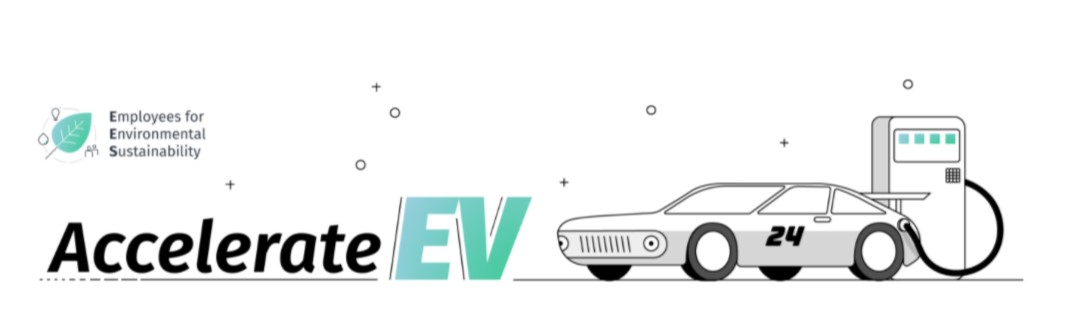

## The Challenge
- The hackathon Accelerate EV poses two challenges for smart minds at HERE: Help us ensure that EV charging infrastructure and clean energy systems will be deployed where it is most needed. Together we can create killer products and make a contribution to the global energy transition at the same time! Solutions should leverage services from HERE portfolio where possible. Participants can contribute right after Hackathon campaign launch during the ideation phase or pick up pre-selected challenges listed here and contribute directly during the POC development phase.

### Contributor Names
- Rohit Rajbhar
- Siddhesh Kadam 

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

### Display option
- To display all the columns in dataset

In [2]:
pd.set_option("display.max_columns",None)

### Reading Data

In [3]:
df=pd.read_excel('cbs_pc4_2020_v1_r.xlsx')
df.head()

,PC4 (Code),INWONER (x1),MAN(x1),WOMAN(x1),INW_014(x1),INW_1524(x1),INW_2544(x1),INW_4564(x1),INW_65PL(x1),P_NL_ACHTG(%),P_WE_MIG_A(%),P_NW_MIG_A(%),AANTAL_HH(x1),TOTHH_EENP(x1),TOTHH_MPZK(x1),HH_EENOUD(x1),HH_TWEEOUD(x1),GEM_HH_GR(x1),WONING(x1),WONVOOR45(x1),WON_4564(x1),WON_6574(x1),WON_7584(x1),WON_8594(x1),WON_9504(x1),WON_0514(x1),WON_1524(x1),WON_MRGEZ(x1),P_KOOPWON(%),P_HUURWON(%),WON_HCORP(x1),WON_NBEW(x1),WOZWONING(x 1 000 Euro),UITKMINAOW(x1),OAD(adressen/km2),STED(categorie)
0,1011,9705,5065,4645,760,1095,3310,2755,1780,60,30,20,6405,4165,1355,335,495,1.5,6220,3605,145,160,840,390,630,395,55,6025,30,70,2460,675,497,715,7039,1
1,1012,8600,4720,3880,410,1305,4405,1720,755,50,40,20,6145,4240,1400,180,250,1.4,5930,4855,20,70,110,495,225,110,45,5625,20,80,715,1130,464,420,8517,1
2,1013,21395,10710,10690,2490,1765,7890,6075,3180,50,20,20,12700,7475,2695,960,1475,1.7,12360,6980,75,120,1615,1480,470,1290,335,12200,30,70,5850,820,464,2375,6436,1
3,1014,2175,1135,1040,435,130,1040,475,100,60,20,10,1060,440,295,50,275,2.0,1190,20,5,5,5,20,190,-99997,940,1075,40,60,120,255,706,135,2974,1
4,1015,14865,7535,7330,1205,1625,5290,4235,2510,60,30,10,9765,6290,2060,490,845,1.5,9920,7305,110,235,765,1075,335,85,10,9440,30,70,3365,1235,521,1160,11029,1


## Size of data

In [4]:
df.shape

(4068, 36)

## Info about data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4068 entries, 0 to 4067
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PC4 (Code)               4068 non-null   int64  
 1   INWONER (x1)             4068 non-null   int64  
 2   MAN(x1)                  4068 non-null   int64  
 3   WOMAN(x1)                4068 non-null   int64  
 4   INW_014(x1)              4068 non-null   int64  
 5   INW_1524(x1)             4068 non-null   int64  
 6   INW_2544(x1)             4068 non-null   int64  
 7   INW_4564(x1)             4068 non-null   int64  
 8   INW_65PL(x1)             4068 non-null   int64  
 9   P_NL_ACHTG(%)            4068 non-null   int64  
 10  P_WE_MIG_A(%)            4068 non-null   int64  
 11  P_NW_MIG_A(%)            4068 non-null   int64  
 12  AANTAL_HH(x1)            4068 non-null   int64  
 13  TOTHH_EENP(x1)           4068 non-null   int64  
 14  TOTHH_MPZK(x1)          

## Checking for null values
- No null value present

In [6]:
df.isnull().sum()

PC4 (Code)                 0
INWONER (x1)               0
MAN(x1)                    0
WOMAN(x1)                  0
INW_014(x1)                0
INW_1524(x1)               0
INW_2544(x1)               0
INW_4564(x1)               0
INW_65PL(x1)               0
P_NL_ACHTG(%)              0
P_WE_MIG_A(%)              0
P_NW_MIG_A(%)              0
AANTAL_HH(x1)              0
TOTHH_EENP(x1)             0
TOTHH_MPZK(x1)             0
HH_EENOUD(x1)              0
HH_TWEEOUD(x1)             0
GEM_HH_GR(x1)              0
WONING(x1)                 0
WONVOOR45(x1)              0
WON_4564(x1)               0
WON_6574(x1)               0
WON_7584(x1)               0
WON_8594(x1)               0
WON_9504(x1)               0
WON_0514(x1)               0
WON_1524(x1)               0
WON_MRGEZ(x1)              0
P_KOOPWON(%)               0
P_HUURWON(%)               0
WON_HCORP(x1)              0
WON_NBEW(x1)               0
WOZWONING(x 1 000 Euro)    0
UITKMINAOW(x1)             0
OAD(adressen/k

## Descriptive Statistical values

In [7]:
df.describe()

,PC4 (Code),INWONER (x1),MAN(x1),WOMAN(x1),INW_014(x1),INW_1524(x1),INW_2544(x1),INW_4564(x1),INW_65PL(x1),P_NL_ACHTG(%),P_WE_MIG_A(%),P_NW_MIG_A(%),AANTAL_HH(x1),TOTHH_EENP(x1),TOTHH_MPZK(x1),HH_EENOUD(x1),HH_TWEEOUD(x1),GEM_HH_GR(x1),WONING(x1),WONVOOR45(x1),WON_4564(x1),WON_6574(x1),WON_7584(x1),WON_8594(x1),WON_9504(x1),WON_0514(x1),WON_1524(x1),WON_MRGEZ(x1),P_KOOPWON(%),P_HUURWON(%),WON_HCORP(x1),WON_NBEW(x1),WOZWONING(x 1 000 Euro),UITKMINAOW(x1),OAD(adressen/km2),STED(categorie)
count,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000
mean,5668.534661,3835.960914,1584.631514,1538.425516,-1911.029990,-1882.181908,-465.138643,205.383481,-862.289331,-531.746559,-5817.445674,-15651.297689,1375.442970,-1873.598574,-1484.185349,-13301.249754,-1812.878073,2.273771,1251.700836,-10281.787365,-15523.795723,-18389.586283,-15719.162242,-15062.958702,-13634.715093,-19991.590462,-35324.153147,-17789.332350,-1677.956490,-6065.908555,-16397.217306,-11788.436824,-1861.325221,-5828.148230,998.240413,-45.400934
std,2669.511938,8143.382455,7785.191520,8274.787460,15983.754096,15428.133361,12444.140600,10053.492193,13050.270926,7822.465521,23427.617857,36347.598507,8079.326672,16160.670215,14228.929810,34175.694985,15110.880278,0.339546,8663.039065,30977.563585,36608.842551,39156.280015,36794.077260,36125.779699,34619.327290,40205.463195,47879.128827,39173.264137,13105.497974,23936.300165,37795.434629,32381.426276,14509.582457,24154.620507,2634.546154,2217.045143
min,1011.000000,-99997.000000,-99997.000000,-99997.000000,-99997.000000,-99997.000000,-99997.000000,-99997.000000,-99997.000000,-99997.000000,-99997.000000,-99997.000000,-99997.000000,-99997.000000,-99997.000000,-99997.000000,-99997.000000,0.000000,-99997.000000,-99997.000000,-99997.000000,-99997.000000,-99997.000000,-99997.000000,-99997.000000,-99997.000000,-99997.000000,-99997.000000,-99997.000000,-99997.000000,-99997.000000,-99997.000000,-99997.000000,-99997.000000,-99997.000000,-99997.000000
25%,3330.500000,685.000000,353.750000,335.000000,100.000000,80.000000,133.750000,220.000000,130.000000,80.000000,0.000000,0.000000,280.000000,75.000000,100.000000,15.000000,90.000000,2.100000,285.000000,35.000000,15.000000,10.000000,15.000000,15.000000,15.000000,5.000000,-99997.000000,10.000000,60.000000,20.000000,25.000000,15.000000,212.750000,35.000000,120.000000,2.000000
50%,5693.000000,2665.000000,1340.000000,1332.500000,405.000000,310.000000,570.000000,780.000000,530.000000,90.000000,10.000000,0.000000,1145.000000,340.000000,370.000000,65.000000,320.000000,2.300000,1170.000000,115.000000,80.000000,80.000000,80.000000,85.000000,65.000000,50.000000,15.000000,140.000000,70.000000,30.000000,205.000000,45.000000,266.000000,160.000000,512.000000,4.000000
75%,8041.250000,7007.500000,3461.250000,3536.250000,1060.000000,810.000000,1655.000000,1910.000000,1355.000000,90.000000,10.000000,10.000000,3216.250000,1120.000000,910.000000,225.000000,776.250000,2.500000,3211.250000,306.250000,325.000000,355.000000,315.000000,285.000000,230.000000,195.000000,80.000000,830.000000,80.000000,40.000000,835.000000,110.000000,325.000000,535.000000,1529.750000,5.000000
max,9999.000000,28495.000000,14195.000000,14300.000000,5860.000000,4940.000000,9870.000000,8920.000000,5370.000000,100.000000,70.000000,80.000000,14380.000000,9095.000000,2725.000000,2140.000000,4360.000000,4.200000,12775.000000,8910.000000,4925.000000,6320.000000,6100.000000,4680.000000,5245.000000,5830.000000,3395.000000,12200.000000,100.000000,100.000000,6875.000000,1565.000000,1368.000000,3595.000000,11598.000000,5.000000


## Data cleaning
- Removing Noise form data.

In [8]:
def replace_values(a):
    b=df[a]
    for i in b:
        if i == -99997:
            b=b.replace(-99997,0)
            b=b.replace(0, round(b.mean()))
    return b

In [9]:
cols=df.columns
for i in cols:
    df[i]=replace_values(i)

In [10]:
df["INWONER (x1)"].unique()

array([ 9705,  8600, 21395, ...,  4500,  3920,   435], dtype=int64)

## Handling outliers
- Couting the total number of outlier present in columns
- Then replacing them by upper limit and lower of that columns.

In [11]:
def lowerupper(col):
    q1=np.quantile(col,.25)
    q3=np.quantile(col,.75)
    inter=q3-q1
    lowerbound=q1-(inter*1.5)
    upperbound=q3+(inter*1.5)
    outlier=[]
    for x in col:
        if((x>upperbound)or(x<lowerbound)):
            outlier.append(x)
    return outlier
col=df.columns
print(col)

Index(['PC4 (Code)', 'INWONER (x1)', 'MAN(x1)', 'WOMAN(x1)', 'INW_014(x1)',
       'INW_1524(x1)', 'INW_2544(x1)', 'INW_4564(x1)', 'INW_65PL(x1)',
       'P_NL_ACHTG(%)', 'P_WE_MIG_A(%)', 'P_NW_MIG_A(%)', 'AANTAL_HH(x1)',
       'TOTHH_EENP(x1)', 'TOTHH_MPZK(x1)', 'HH_EENOUD(x1)', 'HH_TWEEOUD(x1)',
       'GEM_HH_GR(x1)', 'WONING(x1)', 'WONVOOR45(x1)', 'WON_4564(x1)',
       'WON_6574(x1)', 'WON_7584(x1)', 'WON_8594(x1)', 'WON_9504(x1)',
       'WON_0514(x1)', 'WON_1524(x1)', 'WON_MRGEZ(x1)', 'P_KOOPWON(%)',
       'P_HUURWON(%)', 'WON_HCORP(x1)', 'WON_NBEW(x1)',
       'WOZWONING(x 1 000 Euro)', 'UITKMINAOW(x1)', 'OAD(adressen/km2)',
       'STED(categorie)'],
      dtype='object')


In [12]:
for i in col:
    outlier=lowerupper(df[i].values)
    print(len(outlier),"outliers are present in",i)

0 outliers are present in PC4 (Code)
44 outliers are present in INWONER (x1)
49 outliers are present in MAN(x1)
47 outliers are present in WOMAN(x1)
98 outliers are present in INW_014(x1)
132 outliers are present in INW_1524(x1)
140 outliers are present in INW_2544(x1)
53 outliers are present in INW_4564(x1)
51 outliers are present in INW_65PL(x1)
419 outliers are present in P_NL_ACHTG(%)
402 outliers are present in P_WE_MIG_A(%)
627 outliers are present in P_NW_MIG_A(%)
73 outliers are present in AANTAL_HH(x1)
213 outliers are present in TOTHH_EENP(x1)
32 outliers are present in TOTHH_MPZK(x1)
173 outliers are present in HH_EENOUD(x1)
88 outliers are present in HH_TWEEOUD(x1)
145 outliers are present in GEM_HH_GR(x1)
56 outliers are present in WONING(x1)
429 outliers are present in WONVOOR45(x1)
473 outliers are present in WON_4564(x1)
494 outliers are present in WON_6574(x1)
438 outliers are present in WON_7584(x1)
425 outliers are present in WON_8594(x1)
383 outliers are present in 

In [13]:
#replacing outlier    
def lowerupper_b(col):
    q1=np.quantile(col,.25)
    q3=np.quantile(col,.75)
    inter=q3-q1
    lowerbound=q1-(inter*1.5)
    upperbound=q3+(inter*1.5)
    return lowerbound,upperbound

In [14]:
for i in col:
  outlier=lowerupper(df[i].values)
  if  outlier == 0:
    print("No Outlier is present")
  else:
    lu,ub =lowerupper_b(df[i])
    df[i]=np.where(df[i]<lu,lu,df[i])
    df[i]=np.where(df[i]>ub,ub,df[i])

In [15]:
# checking outlier again
for i in col:
    outlier=lowerupper(df[i].values)
    print(len(outlier),"outliers are present in",i)


0 outliers are present in PC4 (Code)
0 outliers are present in INWONER (x1)
0 outliers are present in MAN(x1)
0 outliers are present in WOMAN(x1)
0 outliers are present in INW_014(x1)
0 outliers are present in INW_1524(x1)
0 outliers are present in INW_2544(x1)
0 outliers are present in INW_4564(x1)
0 outliers are present in INW_65PL(x1)
0 outliers are present in P_NL_ACHTG(%)
0 outliers are present in P_WE_MIG_A(%)
0 outliers are present in P_NW_MIG_A(%)
0 outliers are present in AANTAL_HH(x1)
0 outliers are present in TOTHH_EENP(x1)
0 outliers are present in TOTHH_MPZK(x1)
0 outliers are present in HH_EENOUD(x1)
0 outliers are present in HH_TWEEOUD(x1)
0 outliers are present in GEM_HH_GR(x1)
0 outliers are present in WONING(x1)
0 outliers are present in WONVOOR45(x1)
0 outliers are present in WON_4564(x1)
0 outliers are present in WON_6574(x1)
0 outliers are present in WON_7584(x1)
0 outliers are present in WON_8594(x1)
0 outliers are present in WON_9504(x1)
0 outliers are present in

In [16]:
df.describe()

,PC4 (Code),INWONER (x1),MAN(x1),WOMAN(x1),INW_014(x1),INW_1524(x1),INW_2544(x1),INW_4564(x1),INW_65PL(x1),P_NL_ACHTG(%),P_WE_MIG_A(%),P_NW_MIG_A(%),AANTAL_HH(x1),TOTHH_EENP(x1),TOTHH_MPZK(x1),HH_EENOUD(x1),HH_TWEEOUD(x1),GEM_HH_GR(x1),WONING(x1),WONVOOR45(x1),WON_4564(x1),WON_6574(x1),WON_7584(x1),WON_8594(x1),WON_9504(x1),WON_0514(x1),WON_1524(x1),WON_MRGEZ(x1),P_KOOPWON(%),P_HUURWON(%),WON_HCORP(x1),WON_NBEW(x1),WOZWONING(x 1 000 Euro),UITKMINAOW(x1),OAD(adressen/km2),STED(categorie)
count,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000
mean,5668.534661,4264.377827,2119.816249,2149.849281,671.568338,520.036504,1033.368486,1189.309857,843.219272,84.882006,9.708456,8.914823,1950.902931,710.104228,565.421091,156.167650,499.416667,2.278171,1935.608407,262.617011,250.990290,284.287611,245.185103,222.104966,175.194813,154.859267,71.135693,635.214971,68.808014,31.919862,602.480334,81.263397,278.110128,345.698623,955.551622,3.763766
std,2669.511938,4172.065347,2058.416875,2112.256431,657.124147,511.631069,1076.640814,1118.832023,819.249467,10.423104,1.407437,2.698443,1976.396526,774.282196,523.240058,142.854865,471.888793,0.308968,1932.987884,251.846181,238.807264,262.550848,228.480742,202.530481,161.705617,132.830953,46.121154,626.813932,16.898554,15.973499,568.451853,68.841695,83.978826,354.445459,1041.301696,1.451450
min,1011.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,65.000000,8.000000,7.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.500000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,30.000000,10.000000,5.000000,5.000000,89.000000,5.000000,2.000000,1.000000
25%,3330.500000,710.000000,363.750000,345.000000,120.000000,93.750000,150.000000,235.000000,145.000000,80.000000,8.000000,7.000000,295.000000,90.000000,110.000000,35.000000,100.000000,2.100000,298.750000,60.000000,50.000000,55.000000,45.000000,45.000000,35.000000,40.000000,30.000000,75.000000,60.000000,20.000000,110.000000,25.000000,217.000000,55.000000,120.000000,2.000000
50%,5693.000000,2752.500000,1377.500000,1390.000000,460.000000,350.000000,620.000000,815.000000,580.000000,90.000000,10.000000,7.000000,1185.000000,395.000000,405.000000,145.000000,355.000000,2.300000,1215.000000,165.000000,190.000000,245.000000,200.000000,180.000000,135.000000,155.000000,73.000000,560.000000,70.000000,30.000000,564.000000,70.000000,271.000000,225.000000,514.000000,4.000000
75%,8041.250000,7007.500000,3461.250000,3536.250000,1060.000000,810.000000,1655.000000,1910.000000,1355.000000,90.000000,10.000000,10.000000,3216.250000,1120.000000,910.000000,225.000000,776.250000,2.500000,3211.250000,362.000000,325.000000,355.000000,315.000000,285.000000,230.000000,195.000000,80.000000,830.000000,80.000000,40.000000,835.000000,110.000000,325.000000,535.000000,1529.750000,5.000000
max,9999.000000,16453.750000,8107.500000,8323.125000,2470.000000,1884.375000,3912.500000,4422.500000,3170.000000,100.000000,13.000000,14.500000,7598.125000,2665.000000,2110.000000,510.000000,1790.625000,3.100000,7580.000000,815.000000,737.500000,805.000000,720.000000,645.000000,522.500000,427.500000,155.000000,1962.500000,100.000000,70.000000,1922.500000,237.500000,487.000000,1255.000000,3644.375000,5.000000


## Heatmap
- Corelation map

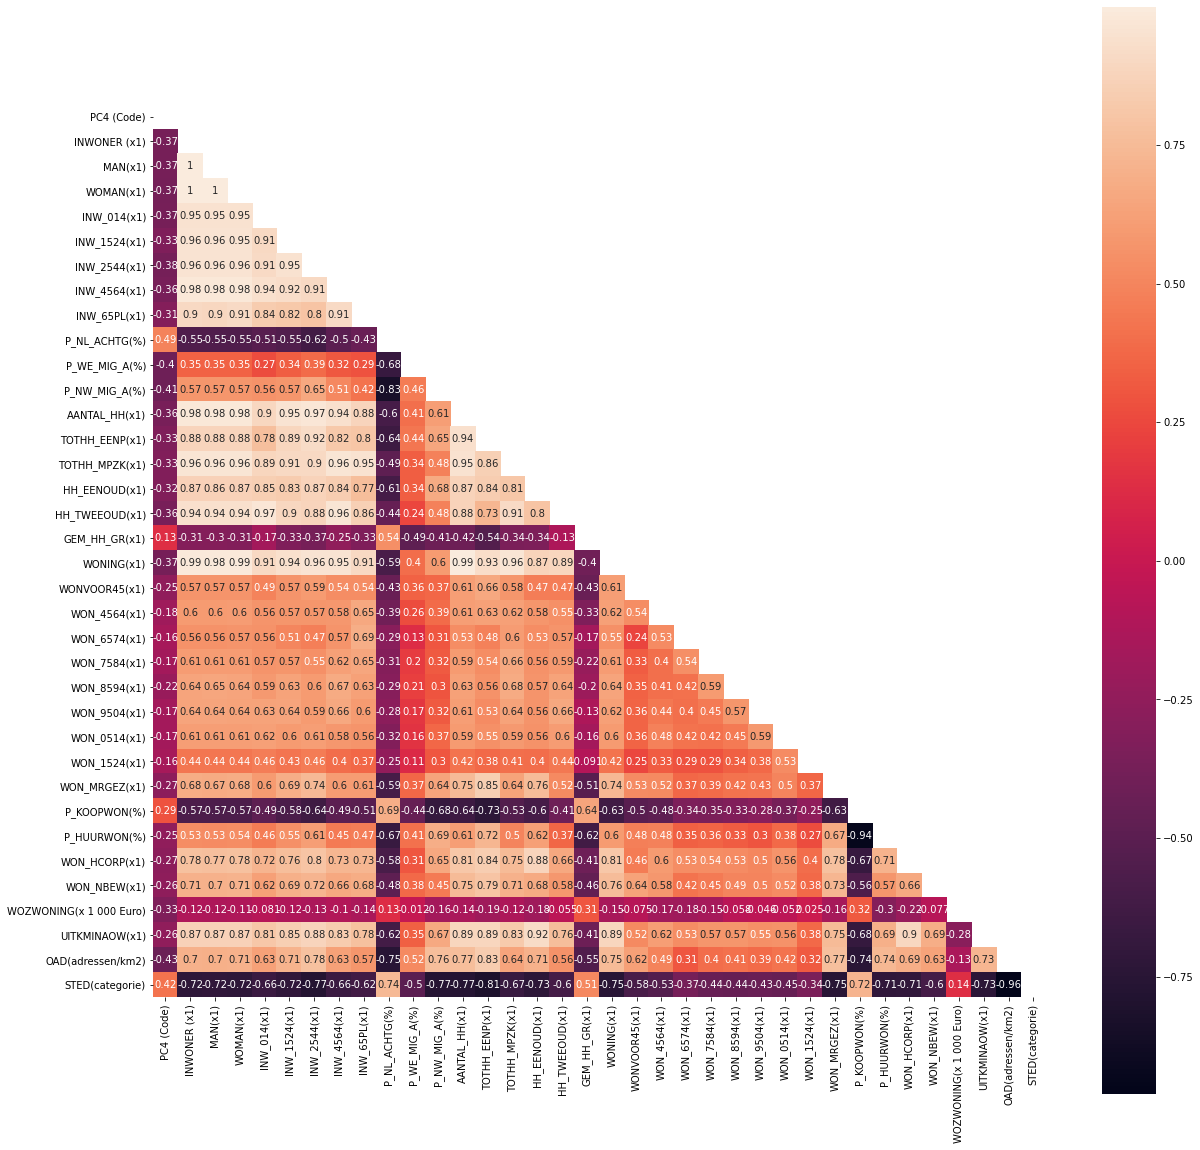

In [17]:
corr=df.corr()
mask= np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
plt.figure(figsize=(20,20))
sb.heatmap(corr, mask=mask, square=True, annot=True)
plt.show()

In [18]:
df.columns

Index(['PC4 (Code)', 'INWONER (x1)', 'MAN(x1)', 'WOMAN(x1)', 'INW_014(x1)',
       'INW_1524(x1)', 'INW_2544(x1)', 'INW_4564(x1)', 'INW_65PL(x1)',
       'P_NL_ACHTG(%)', 'P_WE_MIG_A(%)', 'P_NW_MIG_A(%)', 'AANTAL_HH(x1)',
       'TOTHH_EENP(x1)', 'TOTHH_MPZK(x1)', 'HH_EENOUD(x1)', 'HH_TWEEOUD(x1)',
       'GEM_HH_GR(x1)', 'WONING(x1)', 'WONVOOR45(x1)', 'WON_4564(x1)',
       'WON_6574(x1)', 'WON_7584(x1)', 'WON_8594(x1)', 'WON_9504(x1)',
       'WON_0514(x1)', 'WON_1524(x1)', 'WON_MRGEZ(x1)', 'P_KOOPWON(%)',
       'P_HUURWON(%)', 'WON_HCORP(x1)', 'WON_NBEW(x1)',
       'WOZWONING(x 1 000 Euro)', 'UITKMINAOW(x1)', 'OAD(adressen/km2)',
       'STED(categorie)'],
      dtype='object')

## Countplot


<AxesSubplot:xlabel='STED(categorie)', ylabel='count'>

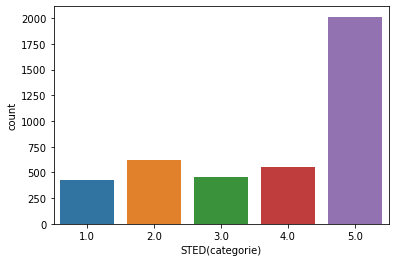

In [19]:
sb.countplot(x="STED(categorie)" , data=df)

In [20]:
df.columns

Index(['PC4 (Code)', 'INWONER (x1)', 'MAN(x1)', 'WOMAN(x1)', 'INW_014(x1)',
       'INW_1524(x1)', 'INW_2544(x1)', 'INW_4564(x1)', 'INW_65PL(x1)',
       'P_NL_ACHTG(%)', 'P_WE_MIG_A(%)', 'P_NW_MIG_A(%)', 'AANTAL_HH(x1)',
       'TOTHH_EENP(x1)', 'TOTHH_MPZK(x1)', 'HH_EENOUD(x1)', 'HH_TWEEOUD(x1)',
       'GEM_HH_GR(x1)', 'WONING(x1)', 'WONVOOR45(x1)', 'WON_4564(x1)',
       'WON_6574(x1)', 'WON_7584(x1)', 'WON_8594(x1)', 'WON_9504(x1)',
       'WON_0514(x1)', 'WON_1524(x1)', 'WON_MRGEZ(x1)', 'P_KOOPWON(%)',
       'P_HUURWON(%)', 'WON_HCORP(x1)', 'WON_NBEW(x1)',
       'WOZWONING(x 1 000 Euro)', 'UITKMINAOW(x1)', 'OAD(adressen/km2)',
       'STED(categorie)'],
      dtype='object')

## Splitting the data

In [21]:
# store class variable  
clsVars = "STED(categorie)"
print("\n*** Class Vars ***")
print(clsVars)



*** Class Vars ***
STED(categorie)


In [22]:
X=df[['PC4 (Code)', 'INWONER (x1)', 'MAN(x1)', 'WOMAN(x1)', 'INW_014(x1)',
       'INW_1524(x1)', 'INW_2544(x1)', 'INW_4564(x1)', 'INW_65PL(x1)',
       'P_NL_ACHTG(%)', 'P_WE_MIG_A(%)', 'P_NW_MIG_A(%)', 'AANTAL_HH(x1)',
       'TOTHH_EENP(x1)', 'TOTHH_MPZK(x1)', 'HH_EENOUD(x1)', 'HH_TWEEOUD(x1)',
       'GEM_HH_GR(x1)', 'WONING(x1)', 'WONVOOR45(x1)', 'WON_4564(x1)',
       'WON_6574(x1)', 'WON_7584(x1)', 'WON_8594(x1)', 'WON_9504(x1)',
       'WON_0514(x1)', 'WON_1524(x1)', 'WON_MRGEZ(x1)', 'P_KOOPWON(%)',
       'P_HUURWON(%)', 'WON_HCORP(x1)', 'WON_NBEW(x1)',
       'WOZWONING(x 1 000 Euro)', 'UITKMINAOW(x1)', 'OAD(adressen/km2)']]
y=df['STED(categorie)']

## Handle Class Imbalance
- Undersampling

In [23]:
import imblearn
from collections import Counter

In [24]:
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Class=1, n=428 (10.521%)
Class=5, n=2015 (49.533%)
Class=2, n=618 (15.192%)
Class=3, n=456 (11.209%)
Class=4, n=551 (13.545%)


In [25]:
def getUnderSamplerData(X,y): 
    us =  RandomUnderSampler(random_state = 707, replacement=True)
    return (us.fit_resample(X, y))

In [26]:
X, y = getUnderSamplerData(X, y)

In [27]:
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Class=1, n=428 (20.000%)
Class=2, n=428 (20.000%)
Class=3, n=428 (20.000%)
Class=4, n=428 (20.000%)
Class=5, n=428 (20.000%)


## Feature Selection

In [28]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) 

[0.02210693 0.02451779 0.01799864 0.01888853 0.01678058 0.01941359
 0.02535968 0.01943443 0.01999693 0.0368544  0.01393057 0.04915757
 0.02621893 0.03086405 0.01509764 0.01899202 0.01846719 0.02036078
 0.01826433 0.0283723  0.01596312 0.02494209 0.01806782 0.01932877
 0.01601743 0.0184821  0.01458649 0.05940311 0.02365316 0.03041379
 0.01798178 0.01892873 0.01465924 0.01951101 0.22698447]


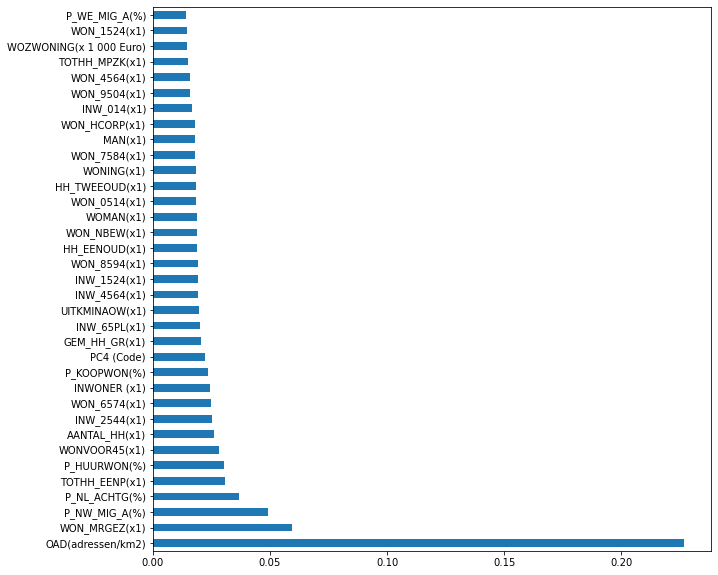

In [29]:
plt.figure(figsize=(10,10))
feat_importances = pd.Series(model.feature_importances_ , index=X.columns)
feat_importances.nlargest(36).plot(kind='barh')
plt.show()

In [30]:
X_n=df[[  'MAN(x1)', 'WOMAN(x1)', 
       'INW_1524(x1)', 'INW_2544(x1)',
       'P_NL_ACHTG(%)', 'P_NW_MIG_A(%)', 
       'TOTHH_EENP(x1)',
        'WONING(x1)', 
        'WON_7584(x1)',  
        'WON_MRGEZ(x1)',
        'UITKMINAOW(x1)', 'OAD(adressen/km2)']]
y_n=df['STED(categorie)']

## Train Test Split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(X_n, y_n, test_size=0.30, random_state=100)

In [32]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape) 
print(y_test.shape)

(2847, 12)
(1221, 12)
(2847,)
(1221,)


## Pipeline
- Logistic Regression
- Decision Tree
- Random forest classifier
- GaussianNB

In [33]:
pipeline_lr=Pipeline([('scalar1',StandardScaler()),
                     
                     ('dt_classifier',LogisticRegression())])

In [34]:
pipeline_dt=Pipeline([('scalar2',StandardScaler()),
                     
                     ('dt_classifier',DecisionTreeClassifier())])

In [35]:
pipeline_randomforest=Pipeline([('scalar3',StandardScaler()),
                     
                     ('rf_classifier',RandomForestClassifier())])

In [36]:
pipeline_gaussian=Pipeline([('scalar4',StandardScaler()),
                     
                     ('rf_classifier',GaussianNB())])

In [37]:
pipelines = [ pipeline_lr, pipeline_dt, pipeline_randomforest,pipeline_gaussian]

In [38]:
best_accuracy=0.0
best_classifier=0
best_pipeline=""

### Dictionary of pipelines and classifier types for ease of reference

In [39]:
pipe_dict = {0:'Logistic Regression', 1: 'Decision Tree', 2: "RandomForest",3:"Gaussian NB"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(x_train, y_train)

C:\Users\sidkadam\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(x_test,y_test)))

Logistic Regression Test Accuracy: 0.9574119574119574
Decision Tree Test Accuracy: 0.9983619983619983
RandomForest Test Accuracy: 0.990990990990991
Gaussian NB Test Accuracy: 0.8722358722358723


In [41]:
for i,model in enumerate(pipelines):
    if model.score(x_test,y_test)>best_accuracy:
        best_accuracy=model.score(x_test,y_test)
        best_pipeline=model
        best_classifier=i
print('Classifier with best accuracy:{}'.format(pipe_dict[best_classifier]))

Classifier with best accuracy:Decision Tree


#### (Optional Statements) 
- We will ignore Decision tree and choose the second higest accuracy score algorithm i.e Random Forest Classifier.
- The reason we ignore Decision tree is becasue it has given accuracy of 100%, which might cause overfitting or it also indicates overfitting. 

## Random Forest Classifier

In [42]:
clf_rf = RandomForestClassifier().fit(x_train, y_train)
prd_rf=clf_rf.predict(x_test)

In [43]:
prd_rf

array([5., 4., 1., ..., 3., 2., 5.])

### Classification report

In [44]:
print(classification_report(y_test,prd_rf))

              precision    recall  f1-score   support

         1.0       1.00      0.95      0.98       128
         2.0       0.97      1.00      0.98       190
         3.0       1.00      1.00      1.00       140
         4.0       0.98      1.00      0.99       165
         5.0       1.00      0.99      1.00       598

    accuracy                           0.99      1221
   macro avg       0.99      0.99      0.99      1221
weighted avg       0.99      0.99      0.99      1221



### Accuracy Score

In [46]:
accuracy_score(y_test,prd_rf)

0.9926289926289926

- If you can get any insight from the above program please like it and also comment your views

## Saving model 

In [48]:
#import pickle
#pickle_out=open("classification.pkl","wb")
#pickle.dump(clf_rf,pickle_out)
#pickle_out.close()